# Bidirectional Long Short-Term Memory (LSTM)

LSTM (Long Short-Term Memory) is a type of recurrent neural network (RNN) architecture designed to address the vanishing gradient problem that can occur when training traditional RNNs. It is particularly effective for modeling sequential data, where each element in the sequence depends on previous elements.

In [5]:
import pandas as pd
train_file = r"C:\Users\BHARGAVI\Downloads\project_data\ghc_train.csv"
test_file = r"C:\Users\BHARGAVI\Downloads\project_data\ghc_test.csv"

# Load CSV files into pandas DataFrames
train_df = pd.read_csv(train_file)
test_df=pd.read_csv(test_file)

# Preprocessing and Tokenizing for DL Models

In [6]:
import pandas as pd

# Function to map original labels to binary values
def map_labels(df):
    label_mapping = {'__label__0': 0, '__label__1': 1}
    if 'label' in df.columns:
        df['label'] = df['label'].map(label_mapping)
    return df

# Function to ensure text column is string type and handle missing values
def preprocess_text_column(df):
    df['text'] = df['text'].fillna('').astype(str)
    return df
    
# Apply functions to preprocess train_df and test_df
train_df = map_labels(train_df)
test_df = map_labels(test_df)

train_df = preprocess_text_column(train_df)
test_df = preprocess_text_column(test_df)


In [7]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Function to tokenize text data
def tokenize_texts(train_texts, test_texts, num_words=None):
    # Convert all values to strings to ensure tokenizer compatibility
    train_texts = [str(text) for text in train_texts]
    test_texts = [str(text) for text in test_texts]
    
    tokenizer = Tokenizer(num_words=num_words)
    tokenizer.fit_on_texts(train_texts)
    
    X_train_seq = tokenizer.texts_to_sequences(train_texts)
    X_test_seq = tokenizer.texts_to_sequences(test_texts)
    
    return tokenizer, X_train_seq, X_test_seq

# Function to pad sequences
def pad_sequences_data(X_train_seq, X_test_seq, max_sequence_length):
    X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length)
    X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length)
    return X_train_padded, X_test_padded

# Function to extract labels
def extract_labels(train_data, test_data):
    y_train = train_data['label'].values
    y_test = test_data['label'].values
    return y_train, y_test

tokenizer, X_train_seq, X_test_seq = tokenize_texts(train_df['text'], test_df['text'], num_words=5000)
X_train_padded, X_test_padded = pad_sequences_data(X_train_seq, X_test_seq, max_sequence_length=100)
y_train, y_test = extract_labels(train_df, test_df)


# One LSTM Layer with 100 Neurons

Epoch 1/5


C:\Users\BHARGAVI\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


477/477 ━━━━━━━━━━━━━━━━━━━━ 115s 233ms/step - accuracy: 0.6929 - loss: 0.5586 - val_accuracy: 0.8191 - val_loss: 0.4436
Epoch 2/5
477/477 ━━━━━━━━━━━━━━━━━━━━ 117s 245ms/step - accuracy: 0.9009 - loss: 0.2678 - val_accuracy: 0.8072 - val_loss: 0.5131
Epoch 3/5
477/477 ━━━━━━━━━━━━━━━━━━━━ 116s 244ms/step - accuracy: 0.9347 - loss: 0.1866 - val_accuracy: 0.8180 - val_loss: 0.5341
Epoch 4/5
477/477 ━━━━━━━━━━━━━━━━━━━━ 122s 255ms/step - accuracy: 0.9553 - loss: 0.1309 - val_accuracy: 0.8531 - val_loss: 0.5536
Epoch 5/5
477/477 ━━━━━━━━━━━━━━━━━━━━ 115s 241ms/step - accuracy: 0.9681 - loss: 0.0974 - val_accuracy: 0.8278 - val_loss: 0.6449
173/173 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - accuracy: 0.8260 - loss: 0.4458
173/173 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step
LSTM Model Classification Report with Adjusted Threshold:
               precision    recall  f1-score   support

     Class 0       0.95      0.77      0.85      4803
     Class 1       0.32      0.72      0.44       707

    accuracy 

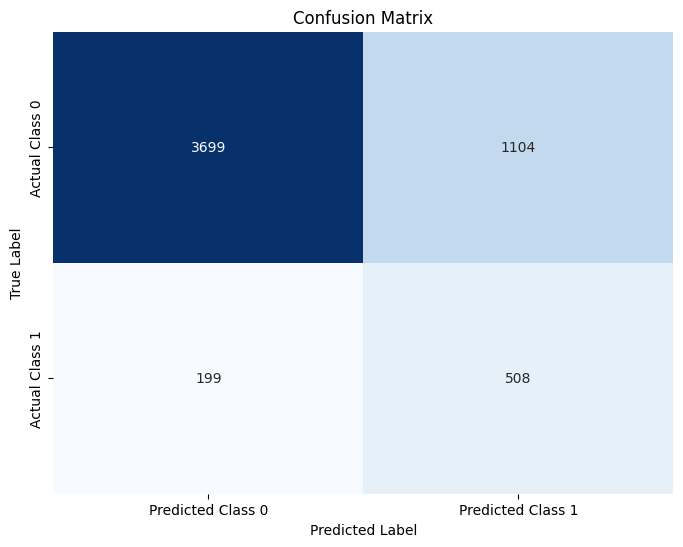

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

# Load datasets
train_df = pd.read_csv(r"C:\Users\BHARGAVI\Downloads\project_data\ghc_train.csv")
test_df = pd.read_csv(r"C:\Users\BHARGAVI\Downloads\project_data\ghc_test.csv")

# Replace NaN values with empty strings
train_df['text'] = train_df['text'].fillna('')
test_df['text'] = test_df['text'].fillna('')

# Extract texts and labels
X = train_df['text'].values.astype(str)
y = train_df['label'].values

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize texts
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(test_df['text'].values.astype(str))

# Pad sequences
max_len = 100  # Maximum sequence length
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_val_padded = pad_sequences(X_val_seq, maxlen=max_len, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Apply Random Oversampling to balance the training data
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_padded, y_train)

# Define LSTM model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_len))
lstm_model.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2)))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compile the model
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with oversampled data
history = lstm_model.fit(X_train_resampled, y_train_resampled, epochs=5, batch_size=64,
                         validation_data=(X_val_padded, y_val),
                         callbacks=[early_stopping])

# Evaluate LSTM model
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_padded, test_df['label'].values)
lstm_y_pred = lstm_model.predict(X_test_padded)
lstm_y_pred_classes = (lstm_y_pred > 0.5).astype(int).flatten()

# Adjust threshold for classification to reduce false negatives
threshold = 0.3
lstm_y_pred_classes_adjusted = (lstm_y_pred > threshold).astype(int).flatten()

# Print classification report
lstm_report = classification_report(test_df['label'].values, lstm_y_pred_classes_adjusted, target_names=['Class 0', 'Class 1'])
print("LSTM Model Classification Report with Adjusted Threshold:\n", lstm_report)

# Print confusion matrix
lstm_conf_matrix = confusion_matrix(test_df['label'].values, lstm_y_pred_classes_adjusted)
print("Confusion Matrix:\n", lstm_conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(lstm_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Class 0', 'Predicted Class 1'],
            yticklabels=['Actual Class 0', 'Actual Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# One LSTM Layer with 64 Neurons


Epoch 1/5


C:\Users\BHARGAVI\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


477/477 ━━━━━━━━━━━━━━━━━━━━ 110s 218ms/step - accuracy: 0.6957 - loss: 0.5564 - val_accuracy: 0.8391 - val_loss: 0.3956
Epoch 2/5
477/477 ━━━━━━━━━━━━━━━━━━━━ 104s 218ms/step - accuracy: 0.9028 - loss: 0.2646 - val_accuracy: 0.8308 - val_loss: 0.4933
Epoch 3/5
477/477 ━━━━━━━━━━━━━━━━━━━━ 142s 218ms/step - accuracy: 0.9354 - loss: 0.1839 - val_accuracy: 0.8368 - val_loss: 0.5459
Epoch 4/5
477/477 ━━━━━━━━━━━━━━━━━━━━ 107s 223ms/step - accuracy: 0.9586 - loss: 0.1279 - val_accuracy: 0.8494 - val_loss: 0.6088
Epoch 5/5
477/477 ━━━━━━━━━━━━━━━━━━━━ 141s 219ms/step - accuracy: 0.9662 - loss: 0.1020 - val_accuracy: 0.8393 - val_loss: 0.6557
173/173 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.8421 - loss: 0.4010
173/173 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step
LSTM Model Classification Report with Adjusted Threshold:
               precision    recall  f1-score   support

     Class 0       0.95      0.82      0.88      4803
     Class 1       0.36      0.68      0.47       707

    accuracy  

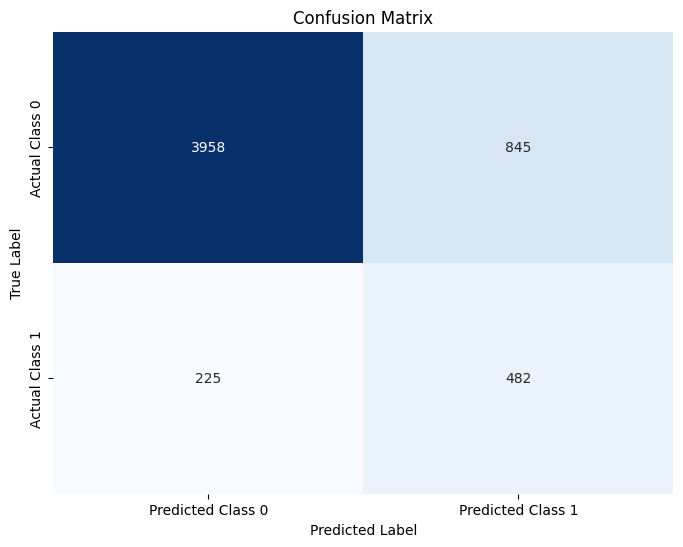

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

# Load datasets
train_df = pd.read_csv(r"C:\Users\BHARGAVI\Downloads\project_data\ghc_train.csv")
test_df = pd.read_csv(r"C:\Users\BHARGAVI\Downloads\project_data\ghc_test.csv")

# Replace NaN values with empty strings
train_df['text'] = train_df['text'].fillna('')
test_df['text'] = test_df['text'].fillna('')

# Extract texts and labels
X = train_df['text'].values.astype(str)
y = train_df['label'].values

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize texts
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(test_df['text'].values.astype(str))

# Pad sequences
max_len = 100  # Maximum sequence length
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_val_padded = pad_sequences(X_val_seq, maxlen=max_len, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Apply Random Oversampling to balance the training data
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_padded, y_train)

# Define LSTM model with 64 neurons
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_len))
lstm_model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compile the model
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with oversampled data
history = lstm_model.fit(X_train_resampled, y_train_resampled, epochs=5, batch_size=64,
                         validation_data=(X_val_padded, y_val),
                         callbacks=[early_stopping])

# Evaluate LSTM model
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_padded, test_df['label'].values)
lstm_y_pred = lstm_model.predict(X_test_padded)
lstm_y_pred_classes = (lstm_y_pred > 0.5).astype(int).flatten()

# Adjust threshold for classification to reduce false negatives
threshold = 0.3
lstm_y_pred_classes_adjusted = (lstm_y_pred > threshold).astype(int).flatten()

# Print classification report
lstm_report = classification_report(test_df['label'].values, lstm_y_pred_classes_adjusted, target_names=['Class 0', 'Class 1'])
print("LSTM Model Classification Report with Adjusted Threshold:\n", lstm_report)

# Print confusion matrix
lstm_conf_matrix = confusion_matrix(test_df['label'].values, lstm_y_pred_classes_adjusted)
print("Confusion Matrix:\n", lstm_conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(lstm_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Class 0', 'Predicted Class 1'],
            yticklabels=['Actual Class 0', 'Actual Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# One LSTM Layer with 128 Neurons


C:\Users\BHARGAVI\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
477/477 ━━━━━━━━━━━━━━━━━━━━ 208s 421ms/step - accuracy: 0.6889 - loss: 0.5698 - val_accuracy: 0.8267 - val_loss: 0.4261
Epoch 2/5
477/477 ━━━━━━━━━━━━━━━━━━━━ 184s 385ms/step - accuracy: 0.9051 - loss: 0.2571 - val_accuracy: 0.8216 - val_loss: 0.4837
Epoch 3/5
477/477 ━━━━━━━━━━━━━━━━━━━━ 189s 357ms/step - accuracy: 0.9410 - loss: 0.1669 - val_accuracy: 0.8455 - val_loss: 0.5307
Epoch 4/5
477/477 ━━━━━━━━━━━━━━━━━━━━ 197s 414ms/step - accuracy: 0.9613 - loss: 0.1154 - val_accuracy: 0.8515 - val_loss: 0.5647
Epoch 5/5
477/477 ━━━━━━━━━━━━━━━━━━━━ 180s 368ms/step - accuracy: 0.9716 - loss: 0.0859 - val_accuracy: 0.8441 - val_loss: 0.6931
173/173 ━━━━━━━━━━━━━━━━━━━━ 16s 92ms/step - accuracy: 0.8309 - loss: 0.4273
173/173 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step
LSTM Model Classification Report with Adjusted Threshold:
               precision    recall  f1-score   support

     Class 0       0.95      0.80      0.87      4803
     Class 1       0.34      0.70      0.46       707

  

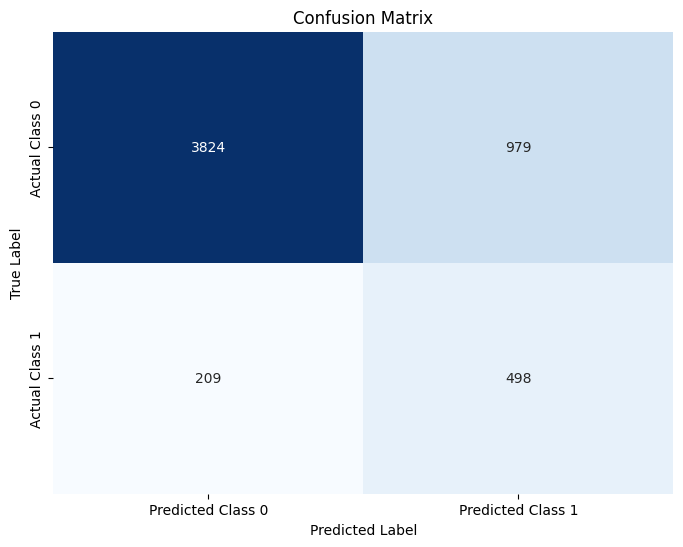

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

# Load datasets
train_df = pd.read_csv(r"C:\Users\BHARGAVI\Downloads\project_data\ghc_train.csv")
test_df = pd.read_csv(r"C:\Users\BHARGAVI\Downloads\project_data\ghc_test.csv")

# Replace NaN values with empty strings
train_df['text'] = train_df['text'].fillna('')
test_df['text'] = test_df['text'].fillna('')

# Extract texts and labels
X = train_df['text'].values.astype(str)
y = train_df['label'].values

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize texts
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(test_df['text'].values.astype(str))

# Pad sequences
max_len = 100  # Maximum sequence length
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_val_padded = pad_sequences(X_val_seq, maxlen=max_len, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Apply Random Oversampling to balance the training data
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_padded, y_train)

# Define LSTM model with 64 neurons
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_len))
lstm_model.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2)))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compile the model
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with oversampled data
history = lstm_model.fit(X_train_resampled, y_train_resampled, epochs=5, batch_size=64,
                         validation_data=(X_val_padded, y_val),
                         callbacks=[early_stopping])

# Evaluate LSTM model
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_padded, test_df['label'].values)
lstm_y_pred = lstm_model.predict(X_test_padded)
lstm_y_pred_classes = (lstm_y_pred > 0.5).astype(int).flatten()

# Adjust threshold for classification to reduce false negatives
threshold = 0.3
lstm_y_pred_classes_adjusted = (lstm_y_pred > threshold).astype(int).flatten()

# Print classification report
lstm_report = classification_report(test_df['label'].values, lstm_y_pred_classes_adjusted, target_names=['Class 0', 'Class 1'])
print("LSTM Model Classification Report with Adjusted Threshold:\n", lstm_report)

# Print confusion matrix
lstm_conf_matrix = confusion_matrix(test_df['label'].values, lstm_y_pred_classes_adjusted)
print("Confusion Matrix:\n", lstm_conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(lstm_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Class 0', 'Predicted Class 1'],
            yticklabels=['Actual Class 0', 'Actual Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# One LSTM Layer with 256 Neurons


C:\Users\BHARGAVI\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
477/477 ━━━━━━━━━━━━━━━━━━━━ 578s 1s/step - accuracy: 0.7048 - loss: 0.5548 - val_accuracy: 0.8278 - val_loss: 0.4144
Epoch 2/5
477/477 ━━━━━━━━━━━━━━━━━━━━ 398s 833ms/step - accuracy: 0.9086 - loss: 0.2494 - val_accuracy: 0.8473 - val_loss: 0.4750
Epoch 3/5
477/477 ━━━━━━━━━━━━━━━━━━━━ 242s 508ms/step - accuracy: 0.9457 - loss: 0.1596 - val_accuracy: 0.8570 - val_loss: 0.5117
Epoch 4/5
477/477 ━━━━━━━━━━━━━━━━━━━━ 223s 468ms/step - accuracy: 0.9612 - loss: 0.1171 - val_accuracy: 0.8310 - val_loss: 0.6243
Epoch 5/5
477/477 ━━━━━━━━━━━━━━━━━━━━ 248s 520ms/step - accuracy: 0.9720 - loss: 0.0849 - val_accuracy: 0.8574 - val_loss: 0.6422
173/173 ━━━━━━━━━━━━━━━━━━━━ 16s 93ms/step - accuracy: 0.8312 - loss: 0.4202
173/173 ━━━━━━━━━━━━━━━━━━━━ 16s 93ms/step
LSTM Model Classification Report with Adjusted Threshold:
               precision    recall  f1-score   support

     Class 0       0.95      0.79      0.86      4803
     Class 1       0.33      0.71      0.45       707

    a

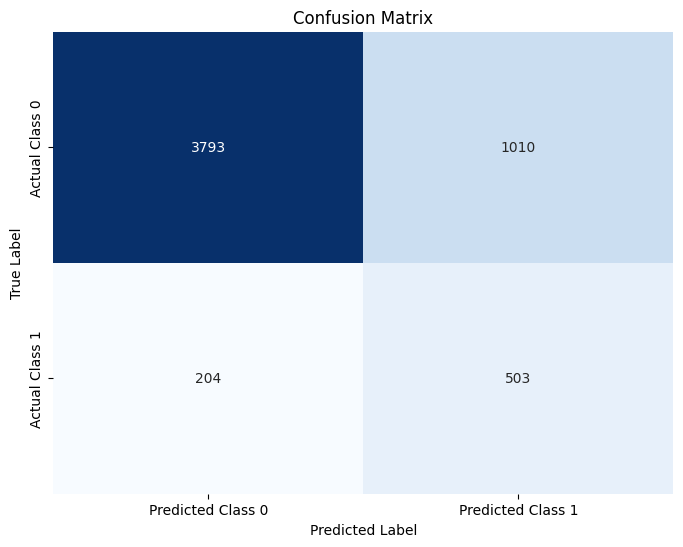

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

# Load datasets
train_df = pd.read_csv(r"C:\Users\BHARGAVI\Downloads\project_data\ghc_train.csv")
test_df = pd.read_csv(r"C:\Users\BHARGAVI\Downloads\project_data\ghc_test.csv")

# Replace NaN values with empty strings
train_df['text'] = train_df['text'].fillna('')
test_df['text'] = test_df['text'].fillna('')

# Extract texts and labels
X = train_df['text'].values.astype(str)
y = train_df['label'].values

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize texts
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(test_df['text'].values.astype(str))

# Pad sequences
max_len = 100  # Maximum sequence length
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_val_padded = pad_sequences(X_val_seq, maxlen=max_len, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Apply Random Oversampling to balance the training data
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_padded, y_train)

# Define LSTM model with 64 neurons
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_len))
lstm_model.add(Bidirectional(LSTM(256, dropout=0.2, recurrent_dropout=0.2)))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compile the model
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with oversampled data
history = lstm_model.fit(X_train_resampled, y_train_resampled, epochs=5, batch_size=64,
                         validation_data=(X_val_padded, y_val),
                         callbacks=[early_stopping])

# Evaluate LSTM model
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_padded, test_df['label'].values)
lstm_y_pred = lstm_model.predict(X_test_padded)
lstm_y_pred_classes = (lstm_y_pred > 0.5).astype(int).flatten()

# Adjust threshold for classification to reduce false negatives
threshold = 0.3
lstm_y_pred_classes_adjusted = (lstm_y_pred > threshold).astype(int).flatten()

# Print classification report
lstm_report = classification_report(test_df['label'].values, lstm_y_pred_classes_adjusted, target_names=['Class 0', 'Class 1'])
print("LSTM Model Classification Report with Adjusted Threshold:\n", lstm_report)

# Print confusion matrix
lstm_conf_matrix = confusion_matrix(test_df['label'].values, lstm_y_pred_classes_adjusted)
print("Confusion Matrix:\n", lstm_conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(lstm_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Class 0', 'Predicted Class 1'],
            yticklabels=['Actual Class 0', 'Actual Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# Two LSTM Layers with 256 and 128 Neurons


Epoch 1/5


C:\Users\BHARGAVI\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


477/477 ━━━━━━━━━━━━━━━━━━━━ 549s 1s/step - accuracy: 0.7149 - loss: 0.5349 - val_accuracy: 0.8262 - val_loss: 0.4418
Epoch 2/5
477/477 ━━━━━━━━━━━━━━━━━━━━ 472s 989ms/step - accuracy: 0.9132 - loss: 0.2367 - val_accuracy: 0.8572 - val_loss: 0.4755
Epoch 3/5
477/477 ━━━━━━━━━━━━━━━━━━━━ 493s 1s/step - accuracy: 0.9503 - loss: 0.1444 - val_accuracy: 0.8320 - val_loss: 0.5564
Epoch 4/5
477/477 ━━━━━━━━━━━━━━━━━━━━ 446s 936ms/step - accuracy: 0.9704 - loss: 0.0919 - val_accuracy: 0.8701 - val_loss: 0.6113
Epoch 5/5
477/477 ━━━━━━━━━━━━━━━━━━━━ 442s 927ms/step - accuracy: 0.9773 - loss: 0.0696 - val_accuracy: 0.8138 - val_loss: 0.7713
173/173 ━━━━━━━━━━━━━━━━━━━━ 28s 160ms/step - accuracy: 0.8270 - loss: 0.4479
173/173 ━━━━━━━━━━━━━━━━━━━━ 29s 163ms/step
LSTM Model Classification Report:
               precision    recall  f1-score   support

     Class 0       0.95      0.77      0.85      4803
     Class 1       0.31      0.71      0.44       707

    accuracy                           0

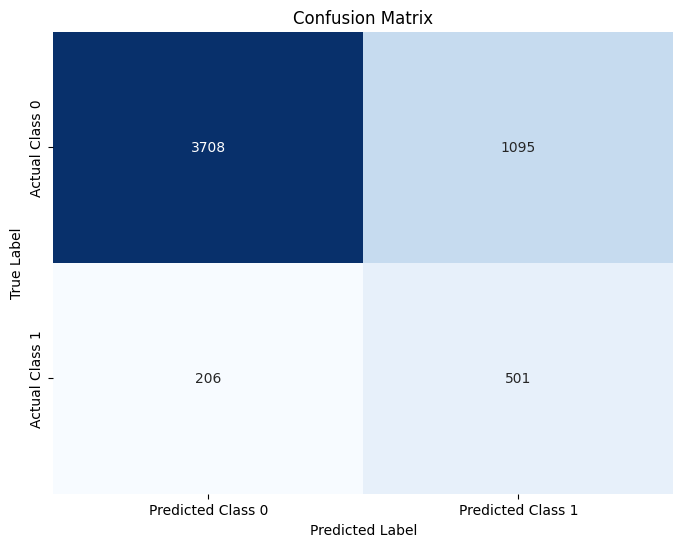

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

# Load datasets
train_df = pd.read_csv(r"C:\Users\BHARGAVI\Downloads\project_data\ghc_train.csv")
test_df = pd.read_csv(r"C:\Users\BHARGAVI\Downloads\project_data\ghc_test.csv")

# Replace NaN values with empty strings
train_df['text'] = train_df['text'].fillna('')
test_df['text'] = test_df['text'].fillna('')

# Extract texts and labels
X = train_df['text'].values.astype(str)
y = train_df['label'].values

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize texts
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(test_df['text'].values.astype(str))

# Pad sequences
max_len = 100  # Maximum sequence length
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_val_padded = pad_sequences(X_val_seq, maxlen=max_len, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Apply Random Oversampling to balance the training data
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_padded, y_train)

# Define LSTM model with two Bidirectional LSTM layers
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_len))
lstm_model.add(Bidirectional(LSTM(256, return_sequences=True, dropout=0.2, recurrent_dropout=0.2)))
lstm_model.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2)))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compile the model
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with oversampled data
history = lstm_model.fit(X_train_resampled, y_train_resampled, epochs=5, batch_size=64,
                         validation_data=(X_val_padded, y_val),
                         callbacks=[early_stopping])

# Evaluate LSTM model
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_padded, test_df['label'].values)
lstm_y_pred = lstm_model.predict(X_test_padded)
lstm_y_pred_classes = (lstm_y_pred > 0.5).astype(int).flatten()

# Adjust threshold for classification
threshold = 0.3
lstm_y_pred_classes_adjusted = (lstm_y_pred > threshold).astype(int).flatten()

# Print classification report
lstm_report = classification_report(test_df['label'].values, lstm_y_pred_classes_adjusted, target_names=['Class 0', 'Class 1'])
print("LSTM Model Classification Report:\n", lstm_report)

# Print confusion matrix
lstm_conf_matrix = confusion_matrix(test_df['label'].values, lstm_y_pred_classes_adjusted)
print("Confusion Matrix:\n", lstm_conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(lstm_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Class 0', 'Predicted Class 1'],
            yticklabels=['Actual Class 0', 'Actual Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# Two LSTM Layers with 128 and 64 Neurons


Epoch 1/5


C:\Users\BHARGAVI\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


477/477 ━━━━━━━━━━━━━━━━━━━━ 480s 984ms/step - accuracy: 0.7152 - loss: 0.5346 - val_accuracy: 0.8030 - val_loss: 0.4435
Epoch 2/5
477/477 ━━━━━━━━━━━━━━━━━━━━ 443s 928ms/step - accuracy: 0.9124 - loss: 0.2390 - val_accuracy: 0.8365 - val_loss: 0.4691
Epoch 3/5
477/477 ━━━━━━━━━━━━━━━━━━━━ 450s 944ms/step - accuracy: 0.9514 - loss: 0.1428 - val_accuracy: 0.8299 - val_loss: 0.5471
Epoch 4/5
477/477 ━━━━━━━━━━━━━━━━━━━━ 444s 932ms/step - accuracy: 0.9647 - loss: 0.1090 - val_accuracy: 0.8506 - val_loss: 0.6417
Epoch 5/5
477/477 ━━━━━━━━━━━━━━━━━━━━ 500s 925ms/step - accuracy: 0.9781 - loss: 0.0721 - val_accuracy: 0.8506 - val_loss: 0.7029
173/173 ━━━━━━━━━━━━━━━━━━━━ 23s 133ms/step - accuracy: 0.8051 - loss: 0.4486
173/173 ━━━━━━━━━━━━━━━━━━━━ 24s 130ms/step
LSTM Model Classification Report with Adjusted Threshold:
               precision    recall  f1-score   support

     Class 0       0.95      0.72      0.82      4803
     Class 1       0.28      0.74      0.40       707

    accura

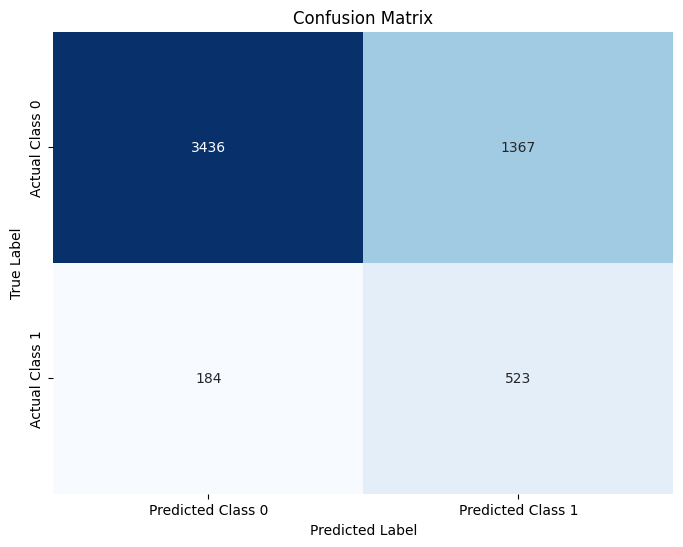

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

# Load datasets
train_df = pd.read_csv(r"C:\Users\BHARGAVI\Downloads\project_data\ghc_train.csv")
test_df = pd.read_csv(r"C:\Users\BHARGAVI\Downloads\project_data\ghc_test.csv")

# Replace NaN values with empty strings
train_df['text'] = train_df['text'].fillna('')
test_df['text'] = test_df['text'].fillna('')

# Extract texts and labels
X = train_df['text'].values.astype(str)
y = train_df['label'].values

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize texts
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(test_df['text'].values.astype(str))

# Pad sequences
max_len = 100  # Maximum sequence length
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_val_padded = pad_sequences(X_val_seq, maxlen=max_len, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Apply Random Oversampling to balance the training data
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_padded, y_train)

# Define LSTM model with two Bidirectional LSTM layers
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_len))
lstm_model.add(Bidirectional(LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2)))
lstm_model.add(Bidirectional(LSTM(64
                                  , dropout=0.2, recurrent_dropout=0.2)))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compile the model
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with oversampled data
history = lstm_model.fit(X_train_resampled, y_train_resampled, epochs=5, batch_size=64,
                         validation_data=(X_val_padded, y_val),
                         callbacks=[early_stopping])

# Evaluate LSTM model
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_padded, test_df['label'].values)
lstm_y_pred = lstm_model.predict(X_test_padded)
lstm_y_pred_classes = (lstm_y_pred > 0.5).astype(int).flatten()

# Adjust threshold for classification to reduce false negatives
threshold = 0.3
lstm_y_pred_classes_adjusted = (lstm_y_pred > threshold).astype(int).flatten()

# Print classification report
lstm_report = classification_report(test_df['label'].values, lstm_y_pred_classes_adjusted, target_names=['Class 0', 'Class 1'])
print("LSTM Model Classification Report with Adjusted Threshold:\n", lstm_report)

# Print confusion matrix
lstm_conf_matrix = confusion_matrix(test_df['label'].values, lstm_y_pred_classes_adjusted)
print("Confusion Matrix:\n", lstm_conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(lstm_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Class 0', 'Predicted Class 1'],
            yticklabels=['Actual Class 0', 'Actual Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# Two LSTM Layers with 256 and 128 Neurons and adding one Dense layer


Epoch 1/5


C:\Users\BHARGAVI\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


477/477 ━━━━━━━━━━━━━━━━━━━━ 1005s 2s/step - accuracy: 0.7080 - loss: 0.5307 - val_accuracy: 0.8503 - val_loss: 0.3894
Epoch 2/5
477/477 ━━━━━━━━━━━━━━━━━━━━ 1471s 3s/step - accuracy: 0.9188 - loss: 0.2217 - val_accuracy: 0.8246 - val_loss: 0.5721
Epoch 3/5
477/477 ━━━━━━━━━━━━━━━━━━━━ 2286s 5s/step - accuracy: 0.9579 - loss: 0.1256 - val_accuracy: 0.8425 - val_loss: 0.5795
Epoch 4/5
477/477 ━━━━━━━━━━━━━━━━━━━━ 817s 2s/step - accuracy: 0.9702 - loss: 0.0908 - val_accuracy: 0.8659 - val_loss: 0.6912
Epoch 5/5
477/477 ━━━━━━━━━━━━━━━━━━━━ 610s 1s/step - accuracy: 0.9807 - loss: 0.0605 - val_accuracy: 0.8469 - val_loss: 0.7923
173/173 ━━━━━━━━━━━━━━━━━━━━ 41s 239ms/step - accuracy: 0.8413 - loss: 0.4120
173/173 ━━━━━━━━━━━━━━━━━━━━ 42s 239ms/step
LSTM Model Classification Report with Adjusted Threshold:
               precision    recall  f1-score   support

     Class 0       0.94      0.85      0.89      4803
     Class 1       0.37      0.62      0.46       707

    accuracy          

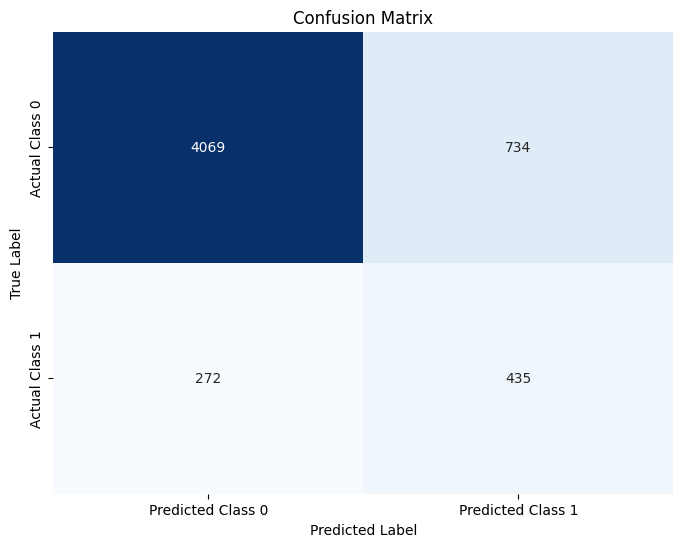

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

# Load datasets
train_df = pd.read_csv(r"C:\Users\BHARGAVI\Downloads\project_data\ghc_train.csv")
test_df = pd.read_csv(r"C:\Users\BHARGAVI\Downloads\project_data\ghc_test.csv")

# Replace NaN values with empty strings
train_df['text'] = train_df['text'].fillna('')
test_df['text'] = test_df['text'].fillna('')

# Extract texts and labels
X = train_df['text'].values.astype(str)
y = train_df['label'].values

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize texts
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(test_df['text'].values.astype(str))

# Pad sequences
max_len = 100  # Maximum sequence length
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_val_padded = pad_sequences(X_val_seq, maxlen=max_len, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Apply Random Oversampling to balance the training data
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_padded, y_train)

# Define LSTM model with two Bidirectional LSTM layers and an additional Dense layer
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_len))
lstm_model.add(Bidirectional(LSTM(256, return_sequences=True, dropout=0.2, recurrent_dropout=0.2)))
lstm_model.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2)))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(256, activation='relu'))  # Extra Dense layer with 256 units
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compile the model
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with oversampled data
history = lstm_model.fit(X_train_resampled, y_train_resampled, epochs=5, batch_size=64,
                         validation_data=(X_val_padded, y_val),
                         callbacks=[early_stopping])

# Evaluate LSTM model
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_padded, test_df['label'].values)
lstm_y_pred = lstm_model.predict(X_test_padded)
lstm_y_pred_classes = (lstm_y_pred > 0.5).astype(int).flatten()

# Adjust threshold for classification to reduce false negatives
threshold = 0.3
lstm_y_pred_classes_adjusted = (lstm_y_pred > threshold).astype(int).flatten()

# Print classification report
lstm_report = classification_report(test_df['label'].values, lstm_y_pred_classes_adjusted, target_names=['Class 0', 'Class 1'])
print("LSTM Model Classification Report with Adjusted Threshold:\n", lstm_report)

# Print confusion matrix
lstm_conf_matrix = confusion_matrix(test_df['label'].values, lstm_y_pred_classes_adjusted)
print("Confusion Matrix:\n", lstm_conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(lstm_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Class 0', 'Predicted Class 1'],
            yticklabels=['Actual Class 0', 'Actual Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
